In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib as mpl
import scienceplots
import seaborn as sns
plt.style.use('science')

In [14]:

file = uproot.open("dati/postFrascati/2p5/Hits.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

Bremm LOr intensity

In [12]:
data1 = data[(data['z'] > 0)]   
data2 = data[(data['z'] < 0)]

print(np.shape(data1))
print(np.shape(data2))

(4193, 12)
(4046, 12)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


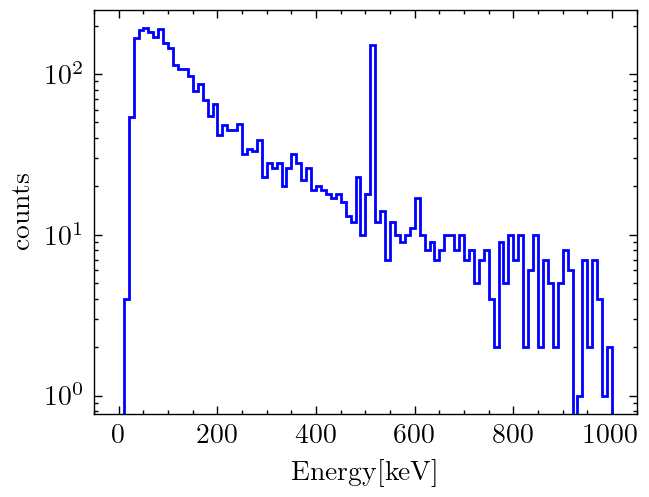

In [15]:
#plt.hist(data1['EDepDet'], bins=100, histtype='step', color='r', label='z>0',range=(0,1))
fig=plt.figure()
fig.dpi=200
plt.hist(np.multiply(data2['energy'],1000), bins=100, histtype='step', color='b',range=(0,1000))
#plt.legend()
plt.yscale('log')
plt.xlabel('Energy[keV]')
plt.ylabel('counts')
plt.yscale('log')
plt.legend()
plt.show()
plt.show()


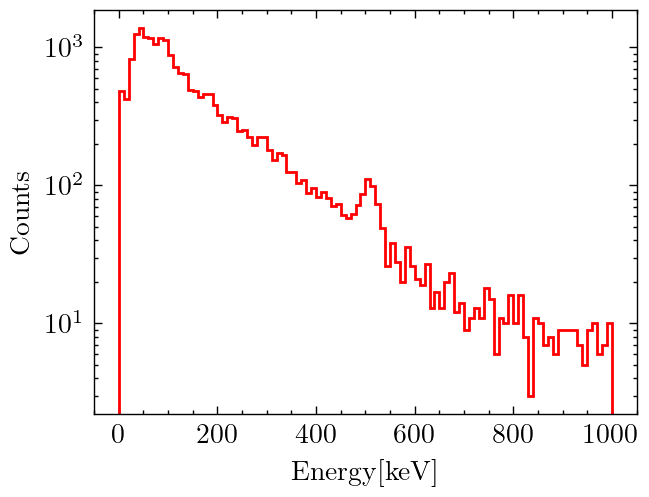

In [22]:
fig=plt.figure()
fig.dpi=200
plt.hist(np.random.normal((np.multiply(data['EDepDet'],1000)),0.03*(np.multiply(data['EDepDet'],1000))), bins=100, histtype='step', color='red',range=(0,1000))
#plt.legend()
#plt.yscale('log')
plt.xlabel('Energy[keV]')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()
plt.show()

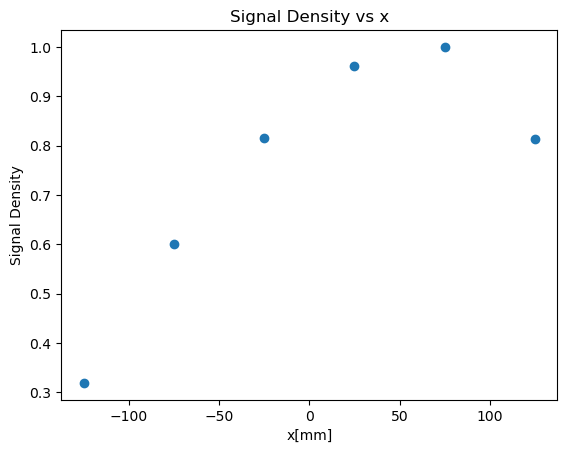

In [82]:
x=[-125,-75,-25,25,75,125]
sig=[4193,7894,10708,12633,13142,10699]
sig=np.array(sig)/np.max(sig)

plt.scatter(x,sig)
plt.xlabel('x[mm]')
plt.ylabel('Signal Density')
plt.title('Signal Density vs x')
plt.show()


Demonstration

(400927,)


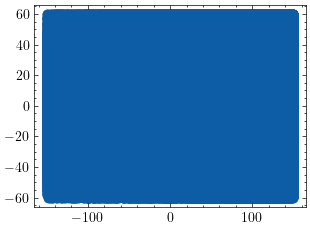

In [313]:
csv_file_path3 = 'dati/preFrascati/cilindrofan/150mev/coll/gamma_entering_particles.csv'


df_gamma = pd.read_csv(csv_file_path3, delimiter=',', header=1, names=['Energy', 'X', 'Y', 'Z','pX', 'pY', 'pZ','evt'])

print(np.shape(df_gamma['X']))


plt.scatter(df_gamma['X'], df_gamma['Y'])
#plt.xlim(-150, 150)
#plt.ylim(-100, 100)
plt.show()

In [3]:

mask = ~np.isclose(df_gamma['Energy'], 510.99, atol=0.1 * 510.99)
df_gamma_filtered = df_gamma[mask]



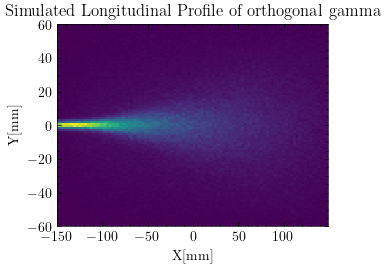

In [210]:
plt.hist2d(df_gamma['X'], df_gamma['Y'], bins=(100,100), cmap='viridis',range=[[-150, 149], [-60, 60]])
plt.xlabel('X[mm]')
plt.ylabel('Y[mm]')
plt.title('Simulated Longitudinal Profile of orthogonal gamma')
plt.show()

Angolare

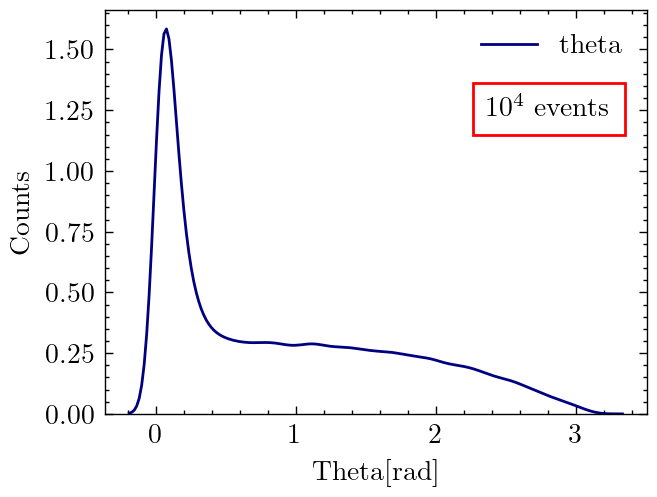

In [315]:
theta=np.arccos(df_gamma['pX']/np.sqrt(df_gamma['pX']**2+df_gamma['pY']**2+df_gamma['pZ']**2))
fig=plt.figure()
fig.dpi=200

sns.kdeplot(theta,  color='navy', label='theta',hue_norm=[0, 1],common_norm=True)
plt.xlabel('Theta[rad]')
plt.ylabel('Counts')
plt.legend()
plt.text(0.92, 0.8, r'$10^4$ events', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='red', boxstyle='square,pad=0.5'))

plt.show()

In [169]:
print(np.shape(df_gamma['evt'].unique()))

(10000,)


(124752,)


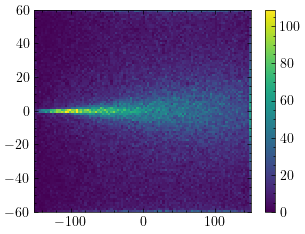

In [330]:
df_gamma['theta']=theta

df_gamma=df_gamma[np.isclose(df_gamma['theta'],1.5,atol=0.7*1.5)]
df_gamma.to_csv('gamma_entering_preproc150.csv', index=False)


print(np.shape(df_gamma['X']))


plt.hist2d(df_gamma['X'], df_gamma['Y'], bins=(100,100), cmap='viridis',range=[[-150, 150], [-60, 60]])
plt.colorbar()
plt.show()

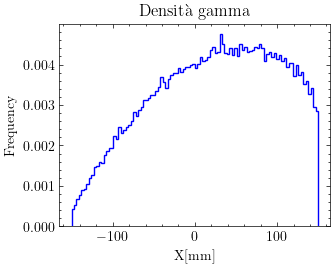

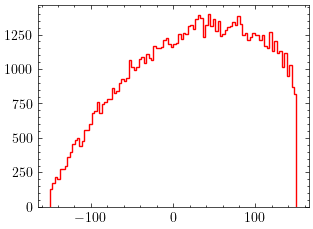

In [331]:
hist2d, x_edges, y_edges = np.histogram2d(df_gamma['X'], df_gamma['Y'], bins=(100000, 1), range=[[-149.9, 149.9], [-100, 100]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

hist_slice = hist_slice / np.sum(hist_slice)    


bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=100,histtype='step',density=True)


# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Frequency')
plt.title('Densità gamma')
plt.show()

sampled_value = np.random.choice(bin_centers_x, p=hist_slice,size=100000)
sampled_value=np.sort(sampled_value, axis=None)


#np.save('gamma_sampled.npy', sampled_value)

plt.hist(sampled_value, histtype='step', color='r',bins=100)
# Show the plot
plt.show()

In [317]:

file = uproot.open("dati/postFrascati/HitsDose.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

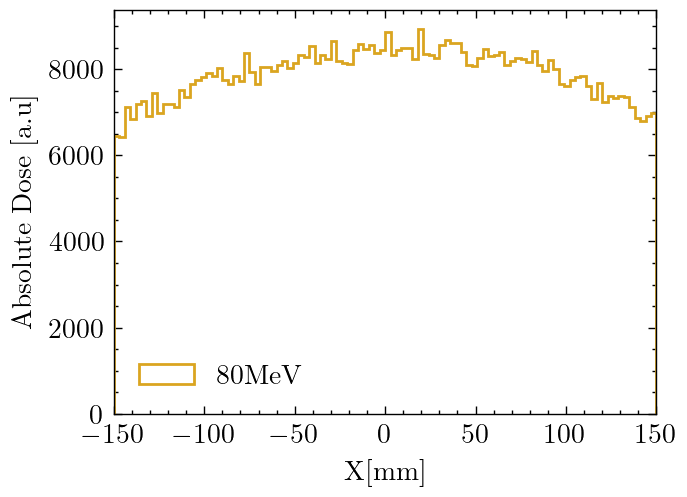

In [320]:

edep= data['EDep']

xloc= data['xloc'] 

fig=plt.figure()
fig.dpi=200
hist, x_edges=np.histogram(xloc,weights=edep, bins=10000)

bin_centers = (x_edges[:-1] + x_edges[1:]) / 2


plt.hist(bin_centers, weights=hist, color='goldenrod'   , bins=100,histtype='step',range=(-150,150),label='80MeV')
plt.legend()
plt.xlabel('X[mm]')
plt.ylabel('Absolute Dose [a.u]')
plt.xlim(-150,150)






plt.show()









#sampled_value_dose = np.random.choice(bin_centers, p=hist,size=100000)
#
#sampled_value_dose=np.sort(sampled_value_dose, axis=None)

#np.save('dose_sampled.npy', sampled_value_dose)

#plt.hist(sampled_value_dose,bins=100 , color='blue',histtype='step',range=(-140,140))


# Show the plot
plt.show()



PLOT DOSE GAMMA

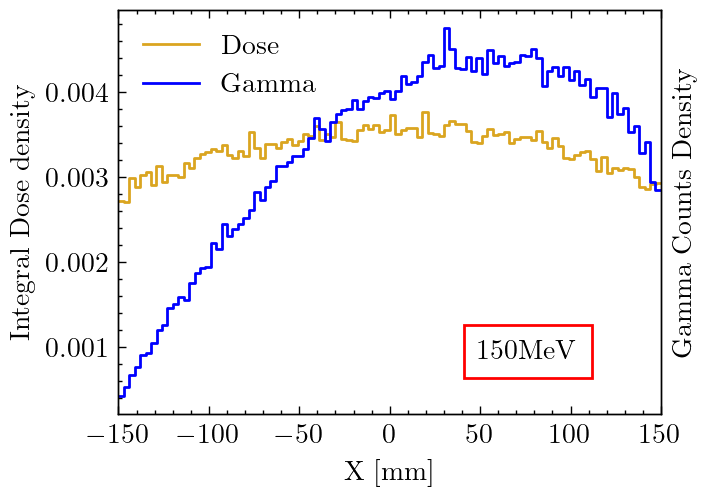

In [341]:
fig=plt.figure()
fig.dpi=200

# Plotting the dose
sns.histplot(x=bin_centers, weights=hist, color='goldenrod', bins=100, label='Dose', element='step',fill=False,stat='density')
plt.xlabel('X [mm]')
plt.ylabel('Integral Dose density')

plt.xlim(-150, 150)

plt.legend()

# Plotting the gamma distribution
sns.histplot(x=bin_centers_x, weights=hist_slice, color='blue', bins=100, label='Gamma', element='step',fill=False,stat='density')

plt.legend()
plt.text(0.9, 0.2, '150MeV', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='red', boxstyle=' square,pad=0.5'))

# Add a right-side ylabel
plt.twinx()
plt.yticks([])
plt.ylabel('Gamma Counts Density ')

# Show the plot
plt.show()



In [66]:
# Read the data from the file
data = np.loadtxt("dati/postFrascati/edep2d.txt", delimiter=",")


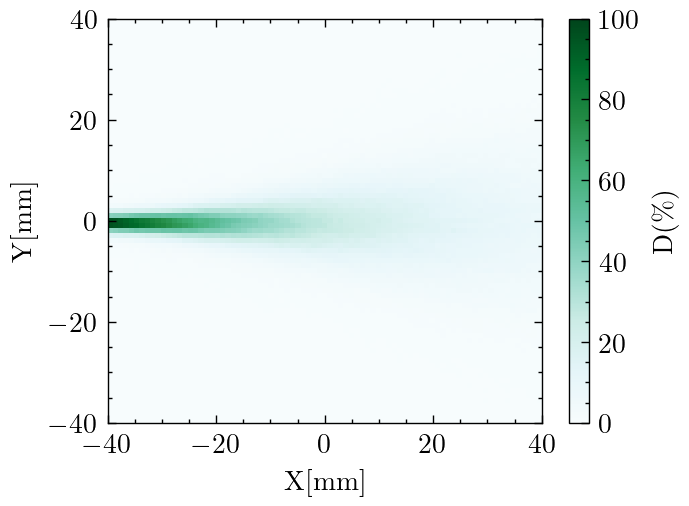

In [144]:
import seaborn as sns
fig, ax = plt.subplots()
fig.dpi=200
# Extract the x and y coordinates
x = data[:, 0]
y = data[:, 2]
x=x-50
y=y-50
data[:,3]=(data[:,3]/np.max(data[:,3]))*100
# Create a 2D histogram
plt.hist2d(x=x, y=y, weights=data[:,3], bins=(100,100), cmap='BuGn',)

# Invert the x-axis

# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Y[mm]')
plt.xlim(-40,40)
plt.ylim(-40,40)
cbar=plt.colorbar()
cbar.set_label('D(\%)')



plt.show()



